In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

In [10]:
N = 100000
random_numbers = np.random.rand(N)

#average
#np.sum, np.mean
mysum = 0
for x in random_numbers:
    mysum += x
μ = mysum / N

mysum = 0
for x in random_numbers:
    mysum += (x - μ)**2
var = mysum/(N)

err = np.sqrt(var/N)


print(var, np.var(random_numbers), μ, np.mean(random_numbers), err)

0.08356578255306077 0.08356578255306098 0.4996575024552012 0.4996575024552103 0.0009141432193757211


(array([10136., 10065.,  9835.,  9988.,  9990.,  9975.,  9926., 10162.,
         9948.,  9975.]),
 array([4.95057966e-06, 1.00002510e-01, 2.00000070e-01, 2.99997630e-01,
        3.99995190e-01, 4.99992750e-01, 5.99990310e-01, 6.99987870e-01,
        7.99985430e-01, 8.99982990e-01, 9.99980550e-01]),
 <BarContainer object of 10 artists>)

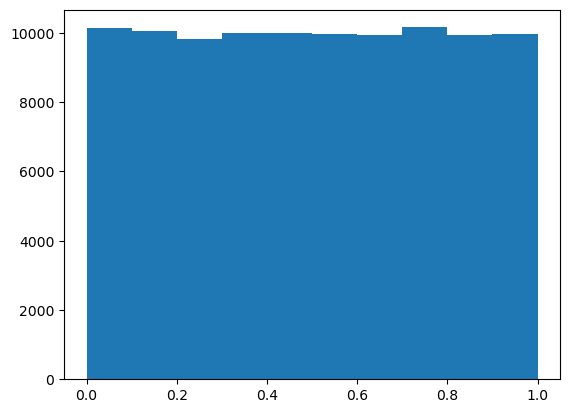

In [11]:
plt.hist(random_numbers)

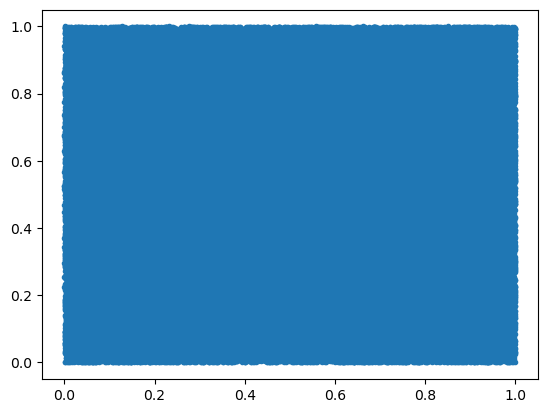

In [12]:
random_numbers = np.random.rand(100000, 2)

plt.plot(random_numbers[:,0], random_numbers[:,1], ".")

(array([ 9973.,  9917., 10029.,  9914.,  9994., 10026.,  9923., 10129.,
        10082., 10013.]),
 array([2.50958838e-05, 1.00021631e-01, 2.00018166e-01, 3.00014701e-01,
        4.00011236e-01, 5.00007771e-01, 6.00004306e-01, 7.00000840e-01,
        7.99997375e-01, 8.99993910e-01, 9.99990445e-01]),
 <BarContainer object of 10 artists>)

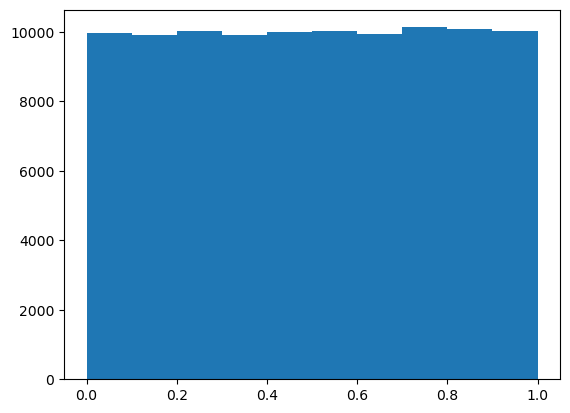

In [13]:
a = 1664525
c = 1013904223
m = 2**32
N = 100000


random_num_gen = lambda x : (a*x + c) % m
random_numbers = np.zeros(N)

x = 423452
for i in range(N):
    x = random_num_gen(x)
    random_numbers[i] = x/m

plt.hist(random_numbers)

### Exercise 2

π = 3.1410448


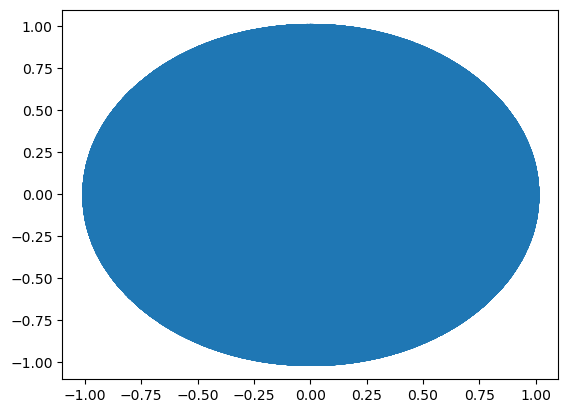

In [14]:
N = 10000000

random_numbers = np.random.rand(N, 2)*2-1
my_sum = np.sum(random_numbers[:,0]**2 + random_numbers[:,1]**2 < 1 * 1)

π = 4*my_sum/N
print(f"π = {π}")

random_numbers_circle = np.delete(random_numbers, np.where(random_numbers[:,0]**2 + random_numbers[:,1]**2 > 1), 0)


plt.plot(random_numbers_circle[:,0], random_numbers_circle[:,1], ".")

### Exercise 3

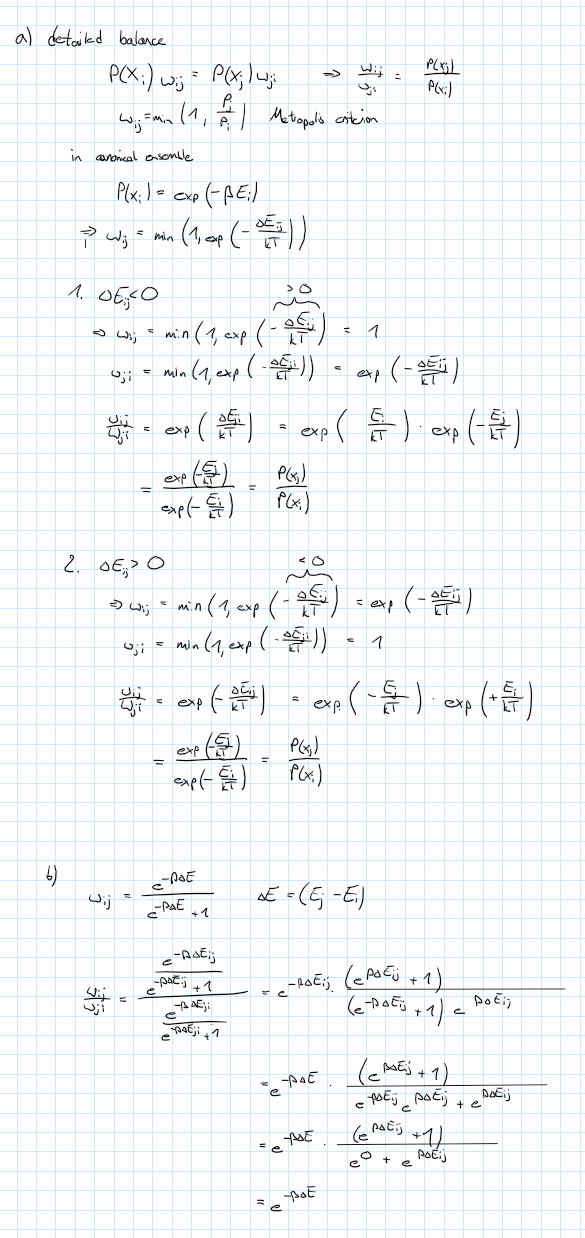
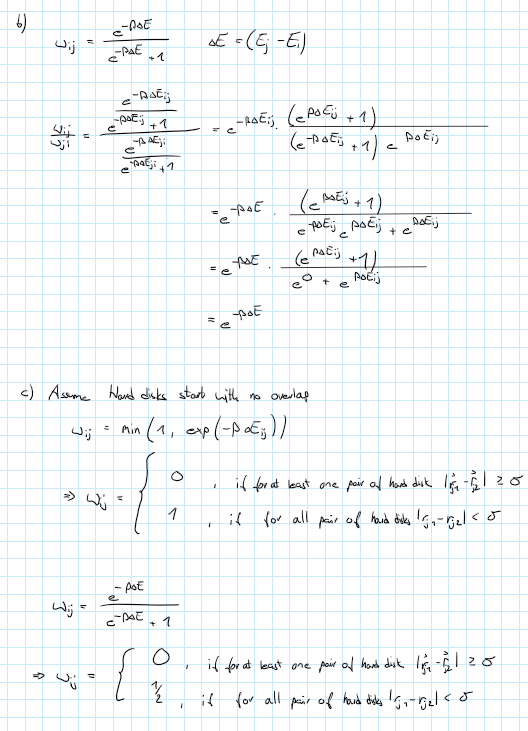

### Exercise 4

$T_C = 2.269$

metropolis:

At temperatures below $T_C$ the domains are bigger, fewer and smoother. If you increase the magnitude of the external field it collapses to a monodomain state, which even stays in place when you set the field back to zero.

At temperatures above $T_C$ the domains are getting smaller and it looks like noise, there the single spins are just random.
The transition between these states hapens aproximately at a temperature between 2-2.5.

wolff:

At temperatures below $T_C$ there is just a monodomain state.

At temperatures above $T_C$ just noise.


The metropolis algorithm is much faster in computing the high temperature state, while the wolff algorithm is much faster at $T<=T_C$. By faster I mean how long it takes until the appearance of the system does not change over time so equlibirum is reached.

In [3]:
N = 1000
spin_grid = np.ones(N)
J = 1
T = 2.269

def flip_spin(spin_grid, i):
    spin_grid[i] = -spin_grid[i]

def get_ΔE_1D(spin_grid, i):
    ΔE = 0
    after_flip = -spin_grid[i]
    for j in [-1,1]:
        pos = i+j
        if pos < 0:
            pos = N-1
        elif pos >= N:
            pos = 0
        ΔE += -2*J*after_flip*spin_grid[pos]
    return ΔE
            

for i in range(100):
    pos = np.random.randint(N)
    ΔE = get_ΔE_1D(spin_grid,pos)
    if np.random.rand() < np.min(1, np.exp(-ΔE/(T*k_B))):
        flip_spin(spin_grid, pos)

For 1D:

$\Delta E = [-4J, 0, 4J]$

For 2D:

$\Delta E = [-8J, -4J, 0, 4J, 8J]$